# Burnout en empleados corporativos
## Análisis de datos - TP 1

Este conjunto de datos fue creado como parte de un estudio de investigación destinado a comprender los factores que contribuyen al agotamiento laboral (*burnout*) de los empleados en entornos corporativos. Los datos fueron recolectados mediante encuestas estructuradas y estudios observacionales realizados en empresas con sede en Bengaluru, India. Se enfoca en una variedad de indicadores relacionados con el bienestar laboral y personal, tales como el equilibrio entre la vida laboral y personal, el apoyo del gerente, los patrones de sueño, la carga de trabajo y el reconocimiento. El conjunto de datos ofrece una visión integral de variables comúnmente asociadas con el estrés y el agotamiento de los empleados, brindando información valiosa para el análisis organizacional y el diseño de estrategias de intervención. *(14-04-2018)*

**Fuente del dataset:**  
Shankar, Kunal, 2018, *"Employee Burnout Analysis"*, Harvard Dataverse, [https://doi.org/10.7910/DVN/VG6KQD](https://doi.org/10.7910/DVN/VG6KQD)  


### Carga de datos y visualización rápida

In [416]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [417]:
sns.set_palette("pastel")


#### 1. Cargar datos desde un archivo CSV a un df de Pandas

In [418]:
df_csv = pd.read_csv("data/enriched_employee_dataset.csv")

In [419]:
# Mostrar las primeras filas (las 5 primeras por defecto)
df_csv.head() 

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,16,53,5.7,2,3,5,17,0
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,16,51,5.2,1,3,4,18,0


In [420]:
df_csv.tail(6) # Mostrar las últimas 6 filas

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
22744,fffe32003500370033003200,2008-05-27,Male,Product,No,3,7.0,6.2,0.54,16,56,5.8,1,3,4,17,1
22745,fffe31003500370039003100,2008-12-30,Female,Service,No,1,3.0,NaN,0.41,16,58,5.3,1,3,4,5,0
22746,fffe33003000350031003800,2008-01-19,Female,Product,Yes,3,6.0,6.7,0.59,16,50,5.8,2,2,5,3,1
22747,fffe390032003000,2008-11-05,Male,Service,Yes,3,7.0,NaN,0.72,16,50,5.2,1,2,4,15,0
22748,fffe33003300320036003900,2008-01-10,Female,Service,No,2,5.0,5.9,0.52,16,59,5.8,2,3,4,8,0
22749,fffe3400350031003800,2008-01-06,Male,Product,No,3,6.0,7.8,0.61,17,53,5.4,2,2,4,17,0


In [421]:
df_csv.shape

(22750, 17)

In [422]:
df_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Employee ID              22750 non-null  object 
 1   Date of Joining          22750 non-null  object 
 2   Gender                   22750 non-null  object 
 3   Company Type             22750 non-null  object 
 4   WFH Setup Available      22750 non-null  object 
 5   Designation              22750 non-null  int64  
 6   Resource Allocation      21369 non-null  float64
 7   Mental Fatigue Score     20633 non-null  float64
 8   Burn Rate                21626 non-null  float64
 9   Years in Company         22750 non-null  int64  
 10  Work Hours per Week      22750 non-null  int64  
 11  Sleep Hours              22750 non-null  float64
 12  Work-Life Balance Score  22750 non-null  int64  
 13  Manager Support Score    22750 non-null  int64  
 14  Deadline Pressure Scor

In [423]:
df_csv.describe()

,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
count,22750.000000,21369.000000,20633.000000,21626.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000,22750.000000
mean,2.178725,4.481398,5.728188,0.452005,16.015956,47.364747,6.153965,2.595604,2.874681,3.400132,11.058022,1.819473
std,1.135145,2.047211,1.920839,0.198226,0.125308,7.651106,0.892709,1.402847,1.281129,1.409178,4.907718,1.713508
min,0.000000,1.000000,0.000000,0.000000,16.000000,35.000000,3.400000,1.000000,1.000000,1.000000,3.000000,0.000000
25%,1.000000,3.000000,4.600000,0.310000,16.000000,40.000000,5.400000,1.000000,2.000000,2.000000,7.000000,0.000000
50%,2.000000,4.000000,5.900000,0.450000,16.000000,49.000000,6.000000,2.000000,3.000000,4.000000,11.000000,1.000000
75%,3.000000,6.000000,7.100000,0.590000,16.000000,54.000000,6.900000,4.000000,4.000000,5.000000,15.000000,3.000000
max,5.000000,10.000000,10.000000,1.000000,17.000000,59.000000,9.100000,5.000000,5.000000,5.000000,19.000000,5.000000


In [424]:
cols_analizar = ['Gender', 'Company Type', 'WFH Setup Available', 'Designation', 'Resource Allocation', 'Years in Company', 'Work-Life Balance Score', 'Manager Support Score', 'Deadline Pressure Score', 'Team Size', 'Recognition Frequency']  

for col in cols_analizar:
    print(f"\nValores únicos en {col}: {df_csv[col].unique()}")


Valores únicos en Gender: ['Female' 'Male']

Valores únicos en Company Type: ['Service' 'Product']

Valores únicos en WFH Setup Available: ['No' 'Yes']

Valores únicos en Designation: [2 1 3 0 4 5]

Valores únicos en Resource Allocation: [ 3.  2. nan  1.  7.  4.  6.  5.  8. 10.  9.]

Valores únicos en Years in Company: [16 17]

Valores únicos en Work-Life Balance Score: [3 5 2 1 4]

Valores únicos en Manager Support Score: [3 4 5 2 1]

Valores únicos en Deadline Pressure Score: [1 3 5 4 2]

Valores únicos en Team Size: [16 10 17 13 18  9 14 12  8 19  3  7 15  4 11  6  5]

Valores únicos en Recognition Frequency: [2 5 0 1 4 3]


**Análisis preliminar de las variables del dataset**

| Variable                | Descripción                                                   | Tipo de dato                                             | Acción posible                       |
|-------------------------|---------------------------------------------------------------|----------------------------------------------------------|--------------------------------------|
| Employee ID             | Código de identificación del empleado                         | Categórica - Nominal                                     | Evaluar quitar del dataset           |
| Date of Joining         | Fecha de inicio                                               | Fecha (Categórica/Numérica según el uso)                 | Convertir a formato fecha            |
| Gender                  | Género (F/M)                                                  | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| Company Type            | Tipo de compañía (Productos/Servicios)                        | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| WFH Setup Available     | Posibilidad de trabajo remoto (*Work From Home*) (Sí/No)      | Categórica - Nominal (Binaria)                           | Convertir a categórica               |
| Designation             | Designación - Nivel jerárquico (0 a 5)                        | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Resource Allocation     | Recursos asignados para realizar las tareas (1 a 10)          | Categórica - Ordinal (Representación numérica discreta)  | Convertir a int + Analizar si nan=0  |
| Mental Fatigue Score    | Nivel de fatiga mental (0 a 10)                               | Numérica continua                                        |                                      |
| Burn Rate               | Tasa de agotamiento (valores entre 0 y 1)                     | Numérica continua                                        | Definir como output (y)              |
| Years in Company        | Años en la empresa (16 o 17)                                  | Numérica discreta                                        | Evaluar quitar del dataset           |
| Work Hours per Week     | Horas de trabajo por semana (entre 35 y 59)                   | Numérica discreta                                        |                                      |
| Sleep Hours             | Horas de sueño (entre 3.4 y 9.1)                              | Numérica continua                                        |                                      |
| Work-Life Balance Score | Nivel de equilibrio trabajo-vida personal (1 a 5)             | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Manager Support Score   | Nivel de apoyo de la organización (1 a 5)                     | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Deadline Pressure Score | Nivel de presión con deadlines (1 a 5)                        | Categórica - Ordinal (Representación numérica discreta)  |                                      |
| Team Size               | Cantidad de personas en el equipo (valores entre 3 y 19)      | Numérica discreta                                        |                                      |
| Recognition Frequency   | Frecuencia de reconocimiento (0 a 5)                          | Categórica - Ordinal (Representación numérica discreta)  |                                      |


### 2. Limpieza de datos

In [425]:
#### 2.1 Revisar datos faltantes y duplicados
print(f"Valores faltantes: {df_csv.isnull().sum()}")  # Calcular valores faltantes

Valores faltantes: Employee ID                   0
Date of Joining               0
Gender                        0
Company Type                  0
WFH Setup Available           0
Designation                   0
Resource Allocation        1381
Mental Fatigue Score       2117
Burn Rate                  1124
Years in Company              0
Work Hours per Week           0
Sleep Hours                   0
Work-Life Balance Score       0
Manager Support Score         0
Deadline Pressure Score       0
Team Size                     0
Recognition Frequency         0
dtype: int64


In [426]:
print("Cantidad de datos duplicados:", df_csv.duplicated().sum())

Cantidad de datos duplicados: 0


In [427]:
print(f"Columnas del dataframe:\n{df_csv.dtypes}\n")

Columnas del dataframe:
Employee ID                 object
Date of Joining             object
Gender                      object
Company Type                object
WFH Setup Available         object
Designation                  int64
Resource Allocation        float64
Mental Fatigue Score       float64
Burn Rate                  float64
Years in Company             int64
Work Hours per Week          int64
Sleep Hours                float64
Work-Life Balance Score      int64
Manager Support Score        int64
Deadline Pressure Score      int64
Team Size                    int64
Recognition Frequency        int64
dtype: object



In [428]:
# Convertir columna de fecha a tipo datetime 
df_csv['Date of Joining'] = pd.to_datetime(df_csv['Date of Joining'], format="%Y-%m-%d")
df_csv.dtypes

Employee ID                        object
Date of Joining            datetime64[ns]
Gender                             object
Company Type                       object
WFH Setup Available                object
Designation                         int64
Resource Allocation               float64
Mental Fatigue Score              float64
Burn Rate                         float64
Years in Company                    int64
Work Hours per Week                 int64
Sleep Hours                       float64
Work-Life Balance Score             int64
Manager Support Score               int64
Deadline Pressure Score             int64
Team Size                           int64
Recognition Frequency               int64
dtype: object

In [429]:
df_csv["Year"] = df_csv["Date of Joining"].dt.year
df_csv.head()

,Employee ID,Date of Joining,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency,Year
0,fffe32003000360033003200,2008-09-30,Female,Service,No,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2,2008
1,fffe3700360033003500,2008-11-30,Male,Service,Yes,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5,2008
2,fffe31003300320037003900,2008-03-10,Female,Product,Yes,2,NaN,5.8,0.49,16,53,5.7,2,3,5,17,0,2008
3,fffe32003400380032003900,2008-11-03,Male,Service,Yes,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2,2008
4,fffe31003900340031003600,2008-07-24,Female,Service,No,3,7.0,6.9,0.52,16,51,5.2,1,3,4,18,0,2008


In [430]:
df_csv['Year'].value_counts()

Year
2008    22750
Name: count, dtype: int64

Se observa que la fecha corresponde probablemente a la fecha en la que realizaron la encuesta, no a la fecha de ingreso a la empresa. Por esta razón, esta columna también podría quitarse, ya que no tendrá incidencia sobre el *Burn Rate*.

In [431]:
# Se genera un nuevo dataset sin las columnas Employee ID, Date of Joining, Year
df = df_csv.drop(columns=['Employee ID', 'Date of Joining', 'Year'])
df.head()

,Gender,Company Type,WFH Setup Available,Designation,Resource Allocation,Mental Fatigue Score,Burn Rate,Years in Company,Work Hours per Week,Sleep Hours,Work-Life Balance Score,Manager Support Score,Deadline Pressure Score,Team Size,Recognition Frequency
0,Female,Service,No,2,3.0,3.8,0.16,16,35,7.5,3,3,1,16,2
1,Male,Service,Yes,1,2.0,5.0,0.36,16,41,7.1,5,3,3,10,5
2,Female,Product,Yes,2,NaN,5.8,0.49,16,53,5.7,2,3,5,17,0
3,Male,Service,Yes,1,1.0,2.6,0.20,16,43,6.7,3,3,1,13,2
4,Female,Service,No,3,7.0,6.9,0.52,16,51,5.2,1,3,4,18,0


### 3. Análisis de las variables categóricas

In [432]:
df['Gender']=df['Gender'].astype('category')
df['Company Type']=df['Company Type'].astype('category')
df['WFH Setup Available']=df['WFH Setup Available'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22750 entries, 0 to 22749
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Gender                   22750 non-null  category
 1   Company Type             22750 non-null  category
 2   WFH Setup Available      22750 non-null  category
 3   Designation              22750 non-null  int64   
 4   Resource Allocation      21369 non-null  float64 
 5   Mental Fatigue Score     20633 non-null  float64 
 6   Burn Rate                21626 non-null  float64 
 7   Years in Company         22750 non-null  int64   
 8   Work Hours per Week      22750 non-null  int64   
 9   Sleep Hours              22750 non-null  float64 
 10  Work-Life Balance Score  22750 non-null  int64   
 11  Manager Support Score    22750 non-null  int64   
 12  Deadline Pressure Score  22750 non-null  int64   
 13  Team Size                22750 non-null  int64   
 14  Recogn

In [433]:
df.describe(include='category')

,Gender,Company Type,WFH Setup Available
count,22750,22750,22750
unique,2,2,2
top,Female,Service,Yes
freq,11908,14833,12290


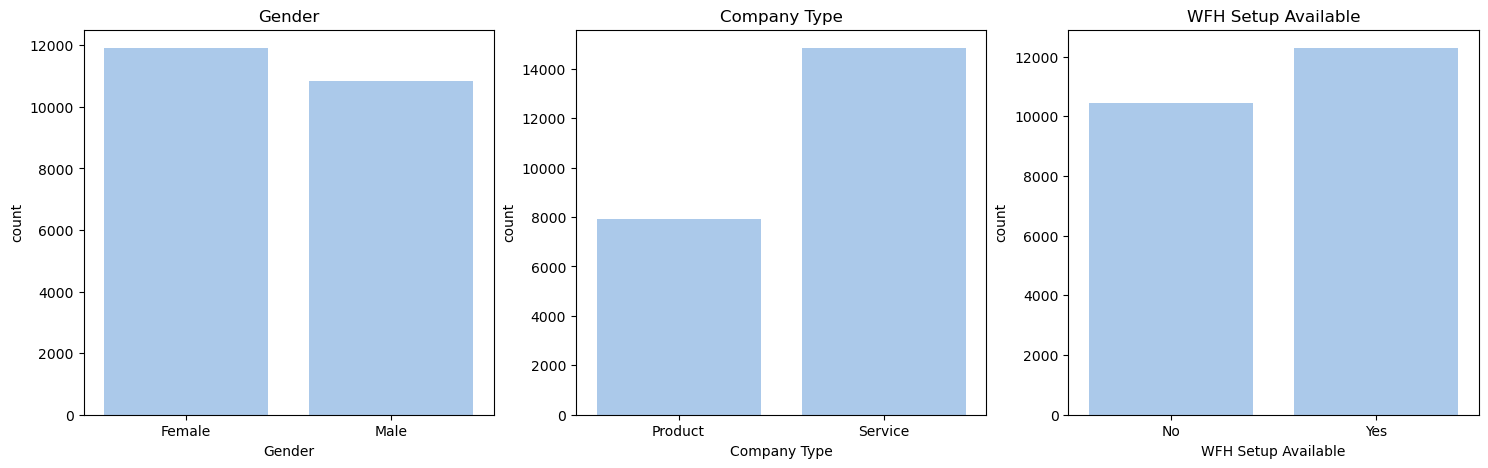

In [434]:
# Gráficos de variables categóricas
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Gráficos de barras de cada una
sns.countplot(x='Gender', data=df, ax=ax[0])
sns.countplot(x='Company Type', data=df, ax=ax[1])
sns.countplot(x='WFH Setup Available', data=df, ax=ax[2])

# Títulos
ax[0].set_title('Gender')
ax[1].set_title('Company Type')
ax[2].set_title('WFH Setup Available')

plt.show()

### 4. Análisis de las variables numéricas

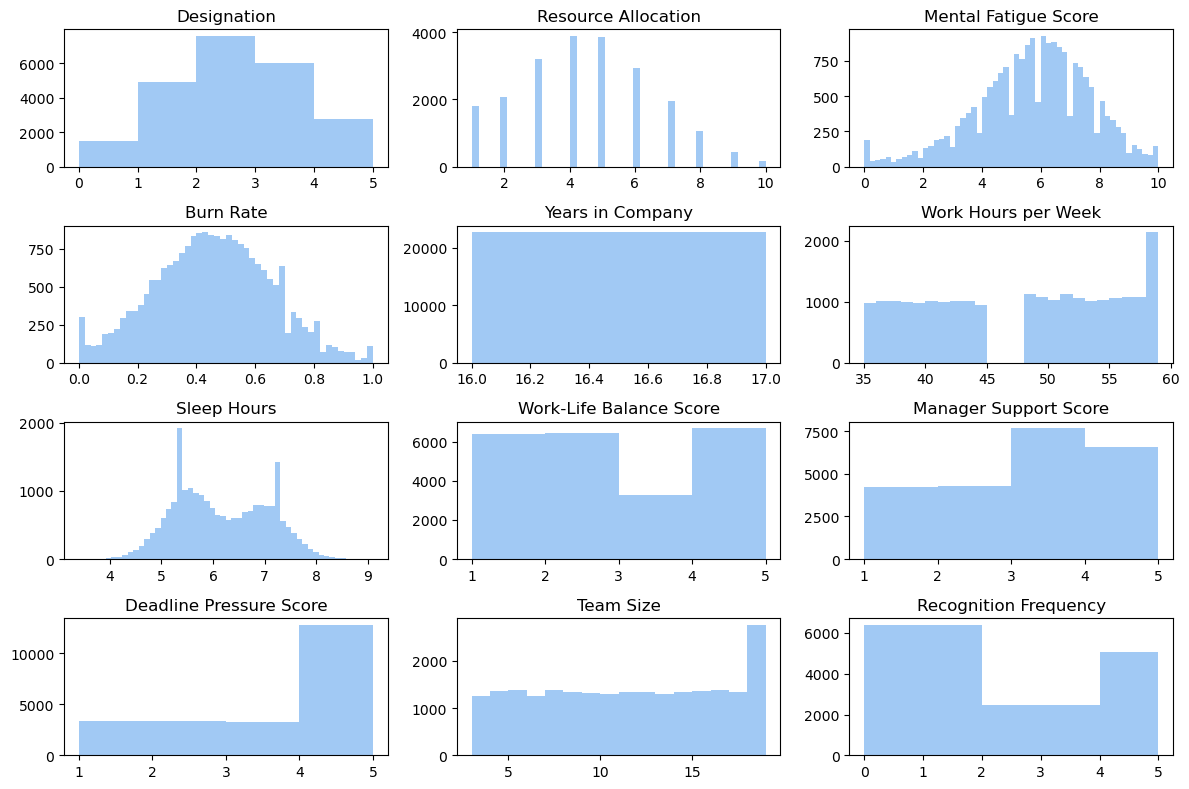

In [435]:
# Selecciona solo columnas numéricas
df_numericas = df.select_dtypes(include='number')

# Plot con subplots (uno por variable)
df_numericas.hist(bins='auto', figsize=(12, 8), grid=False)
plt.tight_layout()
plt.show()

Analizamos la distribución bimodal de Sleep Hours. Se observa que puede estar asociada a la posibilidad de realizar trabajo remoto.

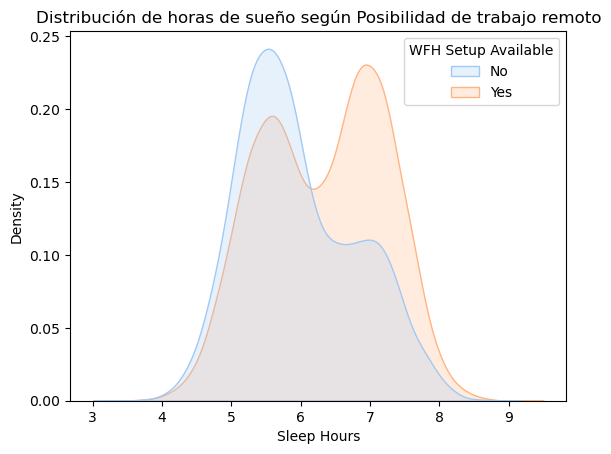

In [436]:
sns.kdeplot(data=df, x='Sleep Hours', hue='WFH Setup Available', fill=True)
plt.title('Distribución de horas de sueño según Posibilidad de trabajo remoto')
plt.show()

Se observa que para Burn Rate y Mental Fatigue Score las distribuciones son aproximadamente normales. Analizamos skewness (asimetría) y curtosis para ambos casos.

In [437]:
print(f"Asímetría de Burn Rate: {df['Burn Rate'].skew()}")
print(f"Curtosis de Burn Rate: {df['Burn Rate'].kurtosis()}")

Asímetría de Burn Rate: 0.045737370909640515
Curtosis de Burn Rate: -0.2615790285447157


**Burn Rate:**
- Asimetría cercana a cero: Aproximadamente simétrica
- Curtosis negativa cercana a cero: Aproximadamente normal, levemente más plana

In [438]:
print(f"Asímetría de Mental Fatigue Score: {df['Mental Fatigue Score'].skew()}")
print(f"Curtosis de Mental Fatigue Score: {df['Mental Fatigue Score'].kurtosis()}")

Asímetría de Mental Fatigue Score: -0.4308950578815428
Curtosis de Mental Fatigue Score: 0.1742766300182641


**Mental Fatigue Score:**
- Asimetría negativa, módulo menor a 0.5: Aproximadamente simétrica, levemente asimétrica hacia la derecha
- Curtosis positiva cercana a cero: Aproximadamente normal, levemente con más pico

### 6. Análisis de las preguntas propuestas

¿Existen diferencias significativas en los niveles de agotamiento laboral entre empleados de diferentes tipos de compañías?

*Analizando el gráfico, no se observan diferencias en los niveles de burnout según si el tipo de compañía es de productos o servicios.*

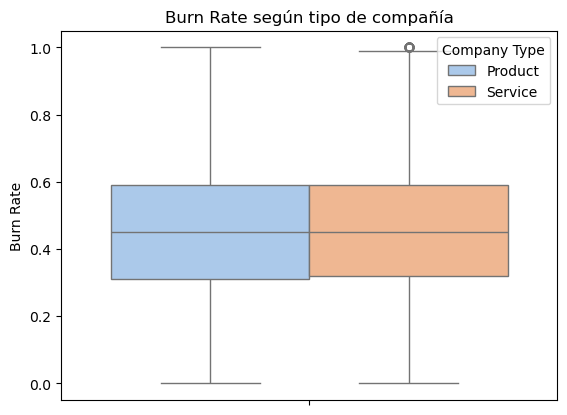

In [439]:
sns.boxplot(data=df, y='Burn Rate', hue='Company Type')
plt.title('Burn Rate según tipo de compañía')
plt.show()

¿En qué medida el apoyo percibido de la organización reduce los niveles de agotamiento laboral entre los empleados?

*Se observa que el nivel de agotamiento laboral es mayor para los empleados que perciben un menor apoyo de la organización, y que disminuye para los casos en que se percibe más apoyo. Además, para los casos en que se percibe menor apoyo (nivel 1 y 2) se observa una gran cantidad de outliers con valores altos (mayores a Q3 + 1.5 * IQR). Esto significa que en estos casos se observan tasas de agotamiento laboral muy superiores al resto de los encontrados en nuestra distribución.*

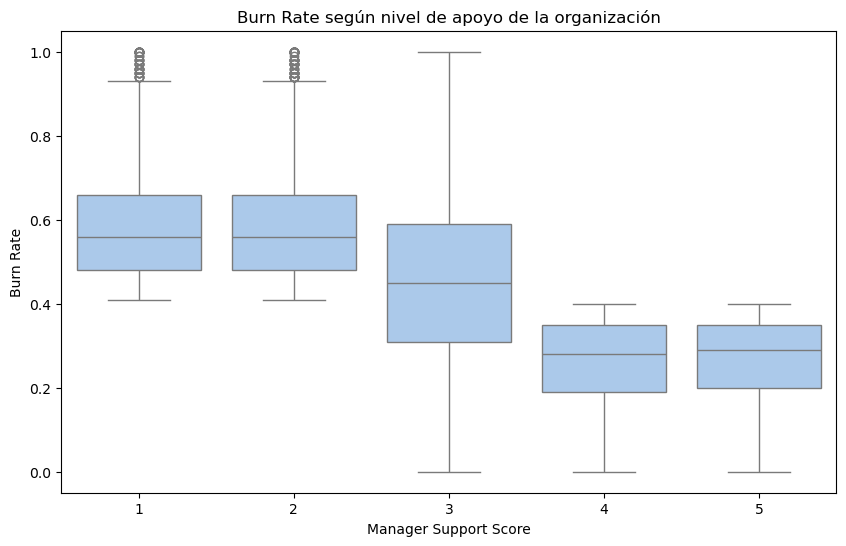

In [444]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y='Burn Rate', x='Manager Support Score')
plt.title('Burn Rate según nivel de apoyo de la organización')
plt.xlabel('Manager Support Score')
plt.ylabel('Burn Rate')
plt.show()

¿Cómo influye el equilibrio entre el trabajo y la vida personal, y la cantidad de horas de descanso en los niveles de agotamiento laboral?

*Se observa que en los casos en que el nivel de equilibrio entre trabajo y vida personal es más bajo, el nivel de agotamiento laboral es mayor, especialmente en los niveles 1 y 2. Además, similar a lo que ocurría en el caso anterior, se observan valores atípicos para el burn rate en los niveles 1 y 2, que están por encima de los valores encontrados en esta distribución. Con respecto a la cantidad de horas de descanso, se observa que las tasas de agotamiento laboral son más bajas cuando las horas de sueño son mayores a 6.5-7 hs. Ambos gráficos se condicen con lo esperado, es decir, que el agotamiento laboral es mayor cuanto peor es el equilibrio entre trabajo y vida laboral y menores son las horas de descanso.*

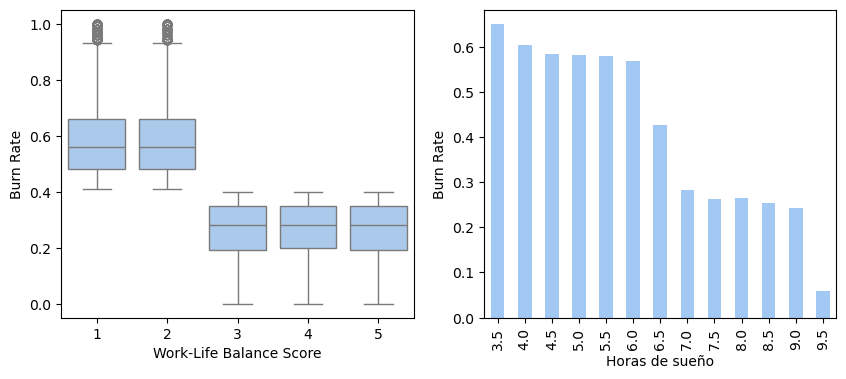

In [441]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# Work-Life Balance Score
sns.boxplot(data=df, y='Burn Rate', x='Work-Life Balance Score', ax=ax[0])
plt.xlabel('Work-Life Balance Score')
plt.ylabel('Burn Rate')

# Horas de sueño - Agrupando los valores cada media hora y redondeando hacia arriba
df['Rango_Descanso'] = np.ceil(df['Sleep Hours'] * 2) / 2
df.groupby('Rango_Descanso')['Burn Rate'].mean().plot(kind='bar', ax=ax[1])
plt.xlabel('Horas de sueño')
plt.ylabel('Burn Rate')

plt.show()

¿Cómo varía el nivel de burnout según la antigüedad de los empleados, el género, el puesto y la disponibilidad de arreglos para trabajar en forma remota?

- *Con respecto a la antiguedad de los empleados no se observan diferencias, pero esto puede estar asociado a que todos los empleados tienen 16 o 17 años de experiencia, lo cual no se traduce en una diferencia en el burnout.*
- *Con respecto al género, se observa que para los hombres los niveles de agotamiento laboral son levemente mayores que para las mujeres. A su vez, se observa que para las mujeres se encuentran gran cantidad de valores atípicos, que están siempre por encima del resto de los valores de la distribución.*
- *En cuanto al puesto, se observa que a medida que aumenta la jerarquía del cargo los niveles de burnout también aumentan.*
- *Con respecto a la posibilidad de trabajo remoto, se observa que quienes trabajan de manera estrictamente presencial presentan mayores niveles de burnout. Para quienes tienen posibilidad de trabajar de forma remota, los niveles de agotamiento son menores, aunque se observan también valores atípicos de agotamiento laboral que están por encima de los del resto de la distribución.*

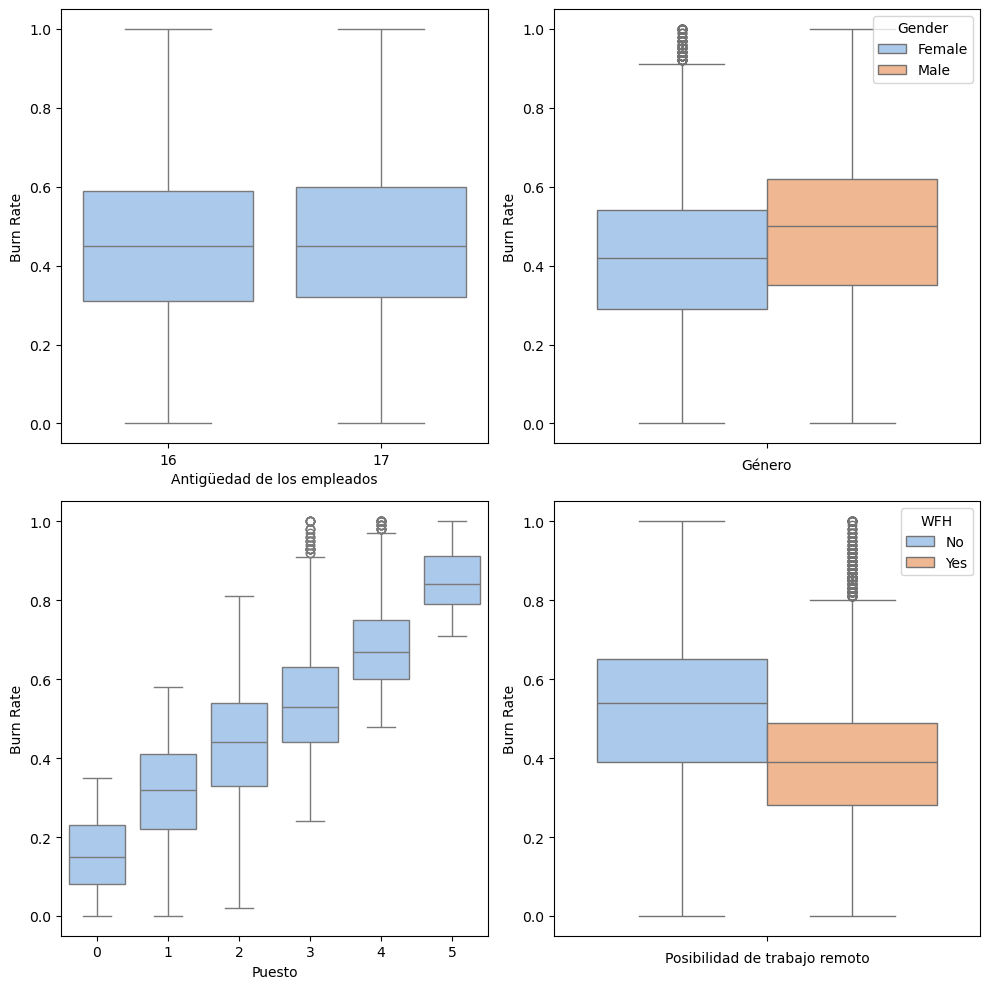

In [442]:
fig, ax = plt.subplots(2, 2, figsize=(10, 10))

# Antigüedad
sns.boxplot(data=df, y='Burn Rate', x='Years in Company', ax=ax[0, 0])
ax[0, 0].set_xlabel('Antigüedad de los empleados')
ax[0, 0].set_ylabel('Burn Rate')

# Género
sns.boxplot(data=df, y='Burn Rate', hue='Gender', ax=ax[0, 1])
ax[0, 1].legend(title='Gender', loc='upper right')
ax[0, 1].set_xlabel('Género')
ax[0, 1].set_ylabel('Burn Rate')

# Puesto
sns.boxplot(data=df, y='Burn Rate', x='Designation', ax=ax[1, 0])
ax[1, 0].set_xlabel('Puesto')
ax[1, 0].set_ylabel('Burn Rate')

# Trabajo remoto
sns.boxplot(data=df, y='Burn Rate', hue='WFH Setup Available', ax=ax[1, 1])
ax[1, 1].legend(title='WFH', loc='upper right')
ax[1, 1].set_xlabel('Posibilidad de trabajo remoto')
ax[1, 1].set_ylabel('Burn Rate')

plt.tight_layout()
plt.show()


### 7. Estrategias sobre datos nulos (PENDIENTE)

Primero evaluaría qué pasa con Resource Allocation, para ver si ese valor es efectivamente nan o si es 0.
Después evaluar quitar todo lo que sea nulo.